In [1]:
import ee 
import geopandas as gpd
import pandas as pd
import importlib
import rasterio
import leafmap

c:\Users\vacha\miniconda3\envs\geo\lib\site-packages\google\api_core\_python_version_support.py:266: FutureWarning: You are using a Python version (3.10.19) which Google will stop supporting in new releases of google.api_core once it reaches its end of life (2026-10-04). Please upgrade to the latest Python version, or at least Python 3.11, to continue receiving updates for google.api_core past that date.
  warnings.warn(message, FutureWarning)


In [2]:
import pipelines
importlib.reload(pipelines)
ee.Initialize()

In [8]:
debug = 99

In [5]:
pipelines.trainingStart("2020-01-01", "2022-01-01", 101, 60, debug = debug)

In [6]:
pipelines.trainingComplete(101, debug = debug, k = 6)

In [15]:
pipelines.monitoringStart("2022-01-01", "2025-01-01", 101, 60, debug = debug)  

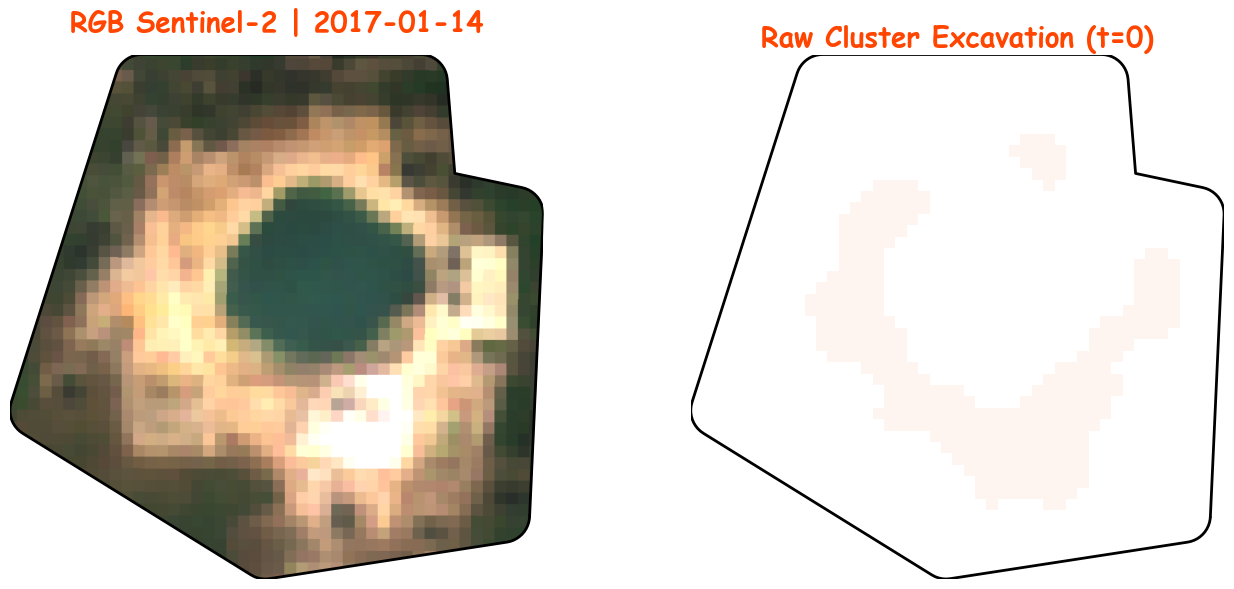

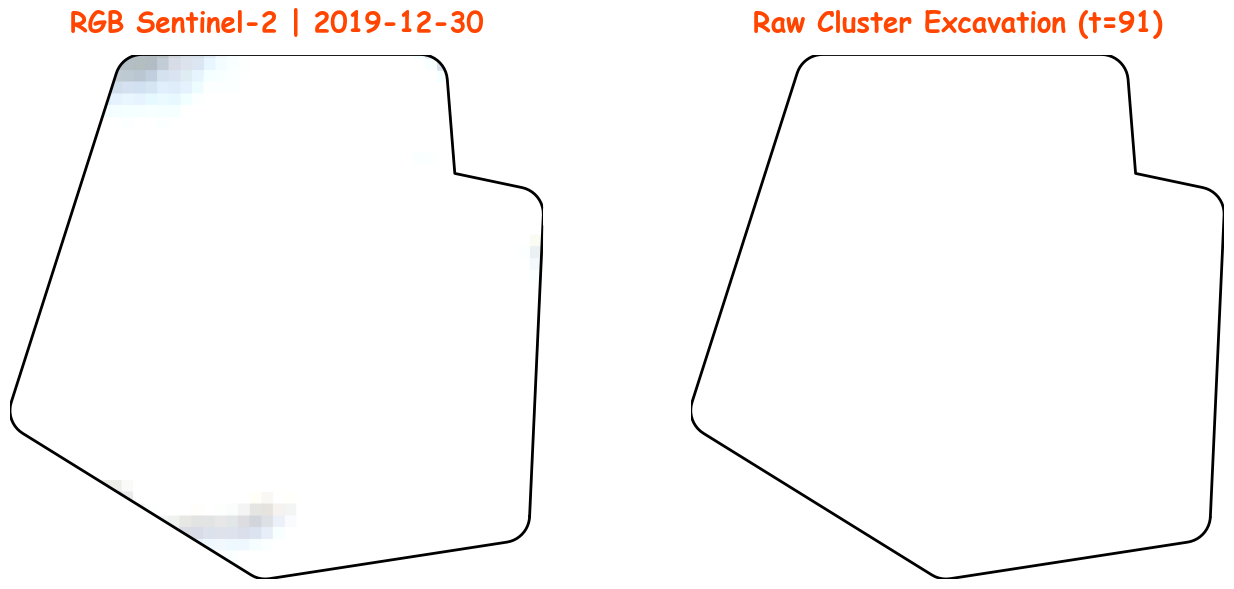

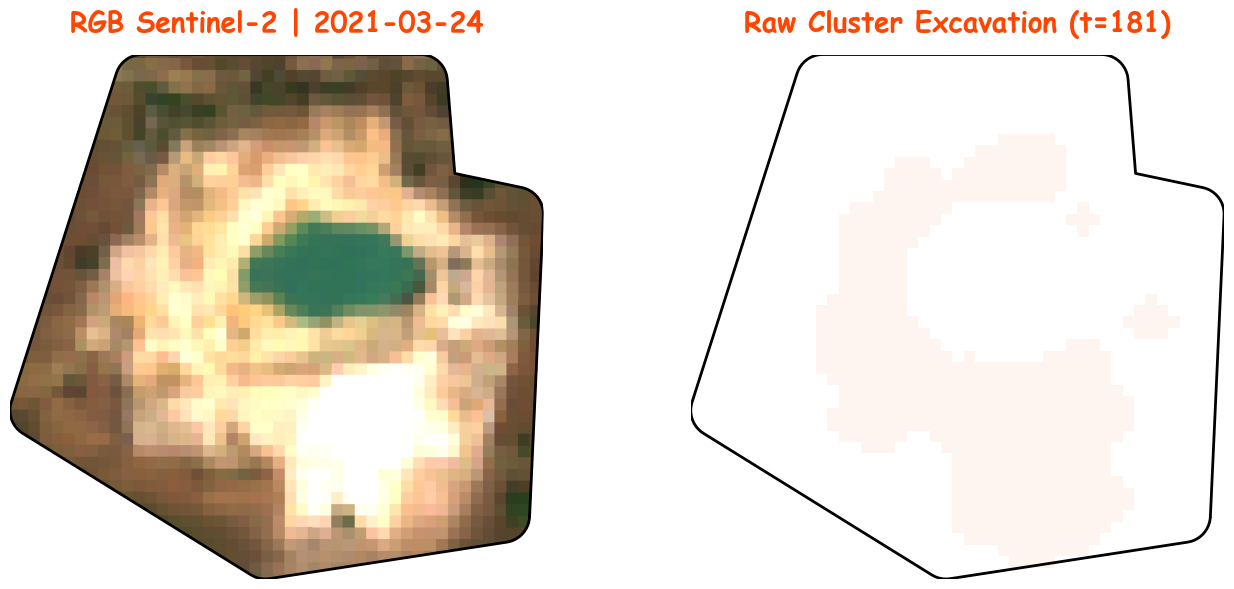

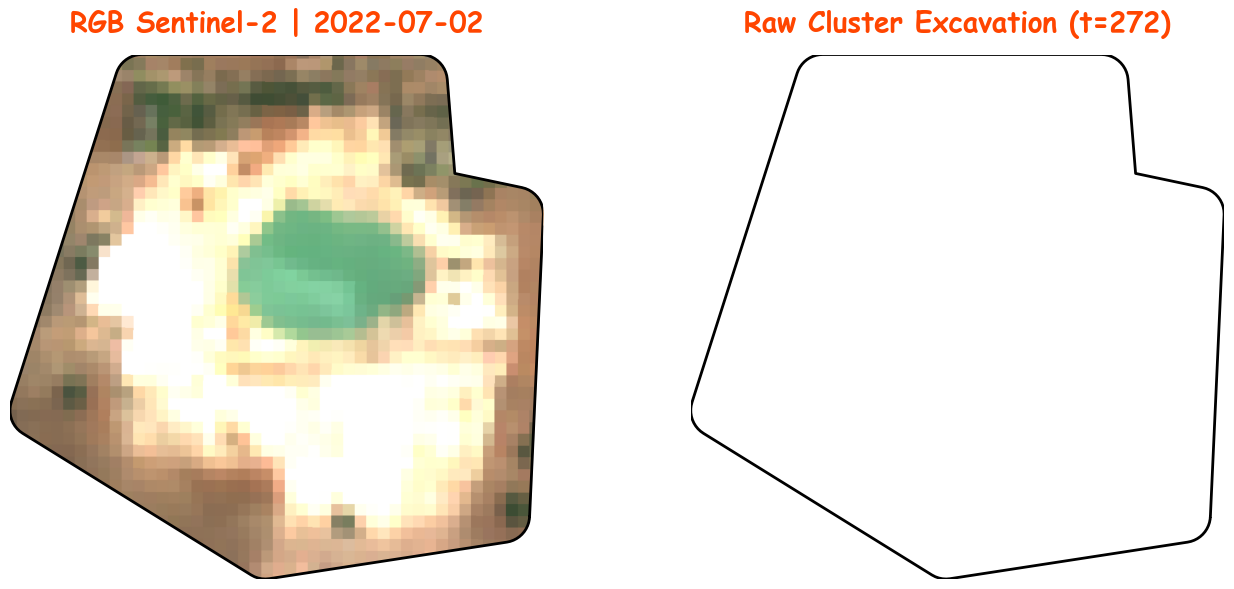

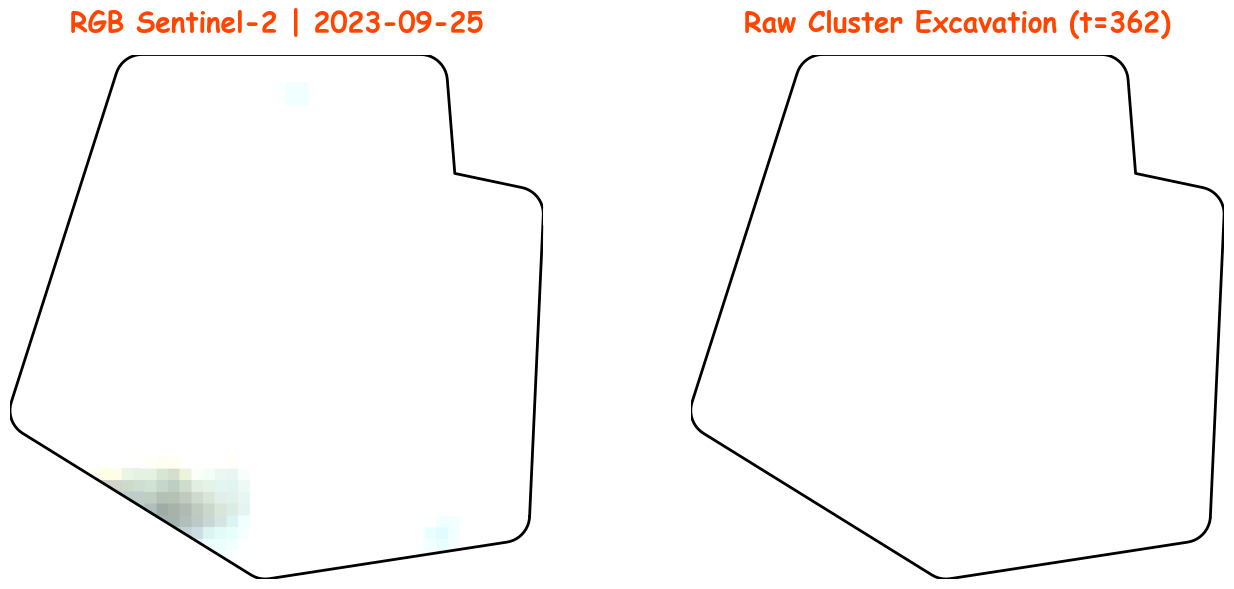

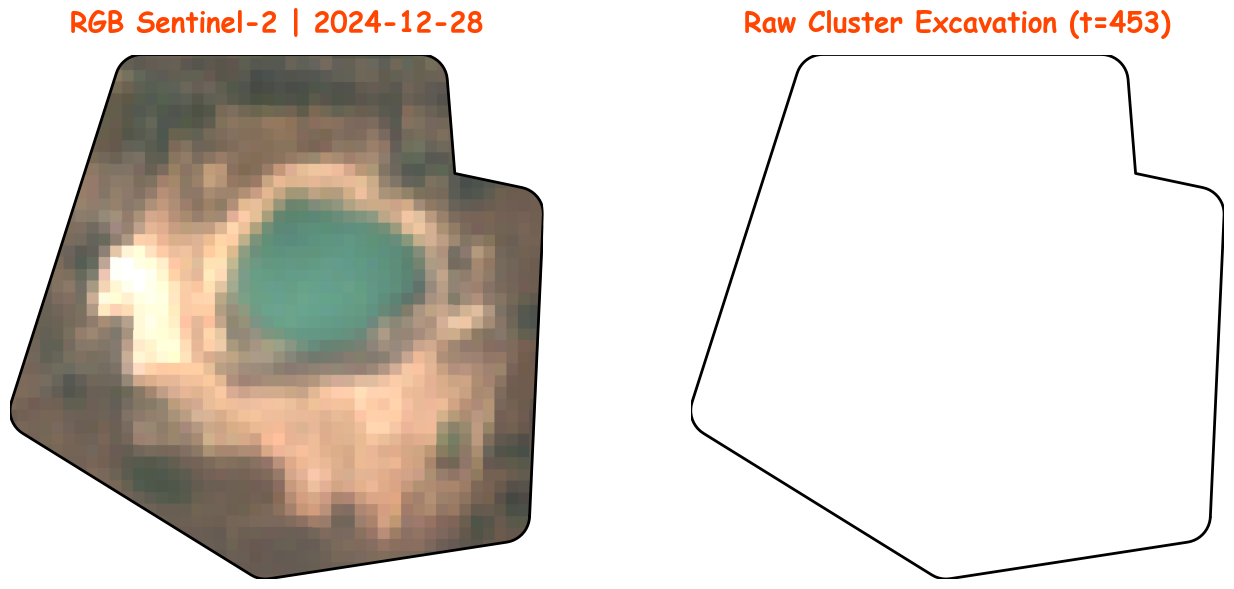

In [16]:
pipelines.monitoringComplete(101, 60, debug = [98, 99])

In [3]:
pipelines.gdf[pipelines.gdf["mine_id"] == 101]

,mine_id,area,perimeter,geometry
101,101,0.16,1.54,"POLYGON ((81.24173 24.28432, 81.24161 24.282, ..."


# No Go polygon creation here

In [9]:
mineId = 226

In [10]:
mines = pipelines.gdf
mine = mines[mines["mine_id"] == mineId]
mine

,mine_id,area,perimeter,geometry
226,226,0.07,1.42,"POLYGON ((82.05037 21.98203, 82.05034 21.98202..."


In [11]:
centroid = mine.geometry.centroid.iloc[0]
m = leafmap.Map(center=[centroid.y, centroid.x], zoom=15)
m.add_gdf(mine, layer_name="Mine Boundary")
m

Map(center=[21.984656916032613, 82.04957279974842], controls=(ZoomControl(options=['position', 'zoom_in_text',…

In [12]:
drawn = m.draw_features
if not drawn:
    raise RuntimeError("No no-go zones drawn!")
nogo = gpd.GeoDataFrame.from_features(drawn,crs="EPSG:4326")
mainDir = f"./Mine Data/Mine_{mineId}_Data/nogozones.geojson"
nogo.to_file(mainDir, driver = "GeoJSON")
mainDir

'./Mine Data/Mine_226_Data/nogozones.geojson'

In [13]:
m2 = leafmap.Map(center=[centroid.y, centroid.x], zoom=15)

m2.add_gdf(mine, layer_name="Mine Boundary")
m2.add_gdf(nogo, layer_name="No-Go Zones")

m2

Map(center=[21.984656916032613, 82.04957279974842], controls=(ZoomControl(options=['position', 'zoom_in_text',…